In [1]:
#naive approach

import pandas as pd
import numpy as np
from time import time as t
import matplotlib.pyplot as plt
import math


In [2]:
traces = np.fromfile('traces_10000x50_int8.bin',dtype='int8')
traces = np.reshape(traces,(-1,50))
traces.shape

# fig, ax = plt.subplots(figsize=(100, 255))
# ax.plot(data, 'black')
# ax.set_xlabel('Samples')
# ax.set_ylabel('Value')
# plt.show()
print(traces[0])
np.shape(traces)

[-13 -16 -14  11  53  48  29  35  32  32  57  32  49  30  52  58  53  39
  48  38  -2   0  -5  -4  44  60  30  38  59  38  48  59  33  61  25  41
  41  53  49  46 -16 -10  -5  -5  -1   9 -14  -1 -16 -14]


(10000, 50)

In [9]:
plain_text = np.fromfile('plaintext_10000x16_uint8.bin',dtype='uint8')

plaintext_10000_16 = np.reshape(plain_text,(-1,16))
firstbyte = plaintext_10000_16[:,0]

for byte in range (16):
    firstbyte = plaintext_10000_16[:,byte]
    print(firstbyte.shape)
# fig, ax = plt.subplots(figsize=(100, 255))
# ax.plot(data, 'black')
# ax.set_xlabel('Samples')
# ax.set_ylabel('Value')
# plt.show()
# print(data[:50])
# firstbyte.shape

(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


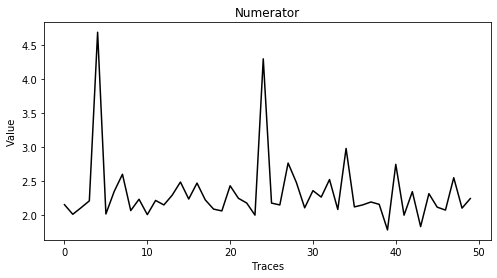

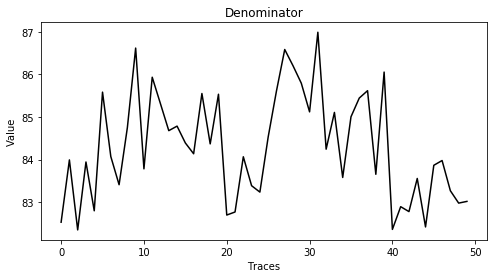

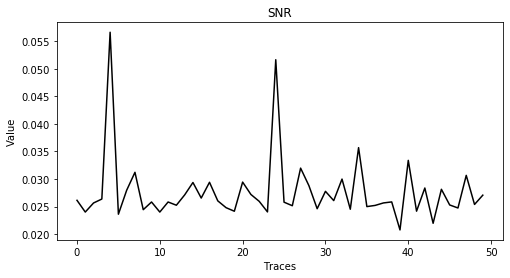

In [13]:

for byte in range (16):
    firstbyte = plaintext_10000_16[:,byte]
    pt_indices = []
    traces_var_mean = []
    traces_mean_var =[]
    snr = []
    for i in range(50):
        traces_mean = []
        traces_var = []
        for j in range (255):
            # pt_indices.append()
            traces_mean.append(np.mean(traces[np.where(firstbyte == j),i]))#calculate the means
            traces_var.append(np.var(traces[np.where(firstbyte == j),i]))#calculate the variance
        traces_var_mean.append(np.var(traces_mean))#numerator
        traces_mean_var.append(np.mean(traces_var))#denominator
    # print(traces_mean_var)
    # print(traces_var_mean)
    snr = np.divide(traces_var_mean,traces_mean_var) #calculate SNR
    #numerator == signal
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(traces_var_mean, 'black')
    ax.set_title('Numerator')
    ax.set_xlabel('Traces')
    ax.set_ylabel('Value')
    plt.show()
    #denominator == noise 
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(traces_mean_var, 'black')
    ax.set_title('Denominator')
    ax.set_xlabel('Traces')
    ax.set_ylabel('Value')
    plt.show()
    #SNR
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(snr, 'black')
    ax.set_title('SNR')
    ax.set_xlabel('Traces')
    ax.set_ylabel('Value')
    plt.show()
